In [153]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df=pd.read_csv('test_2_dataset.csv')
df.head()

,user_id,timestamp,action
0,1,2023-01-01 12:05:00,like
1,2,2023-01-01 12:10:30,comment
2,3,2023-01-01 12:15:45,share
3,1,2023-01-01 12:20:15,like
4,2,2023-01-01 12:25:40,comment


In [155]:
df.describe()

,user_id
count,98.000000
mean,22.295918
std,12.610918
min,1.000000
25%,11.250000
50%,23.000000
75%,34.000000
max,42.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    98 non-null     int64 
 1   timestamp  97 non-null     object
 2   action     98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


# data cleaning

In [157]:
df.isnull().any()

user_id      False
timestamp     True
action       False
dtype: bool

In [158]:
df.isnull().sum()

user_id      0
timestamp    1
action       0
dtype: int64

In [159]:
df.dropna(inplace=True)

In [160]:
df.isnull().any()

user_id      False
timestamp    False
action       False
dtype: bool

In [161]:
df.duplicated().any()

True

In [162]:
df.shape

(97, 3)

## ----------------------------------------------------------------------------------------------------------------------------------

# Q1-calculate the total number of actions performed by each user

In [226]:
ot=df.groupby('user_id')['action'].count()
ot

user_id
1     3
2     3
3     3
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    4
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    3
35    4
36    4
37    4
38    2
39    3
40    2
41    2
42    2
Name: action, dtype: int64

In [227]:
s=ot.index
s

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42],
      dtype='int64', name='user_id')

In [228]:
ip=ot.values
ip

array([3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 2, 3, 2, 2, 2],
      dtype=int64)

Text(0, 0.5, 'no.of actions')

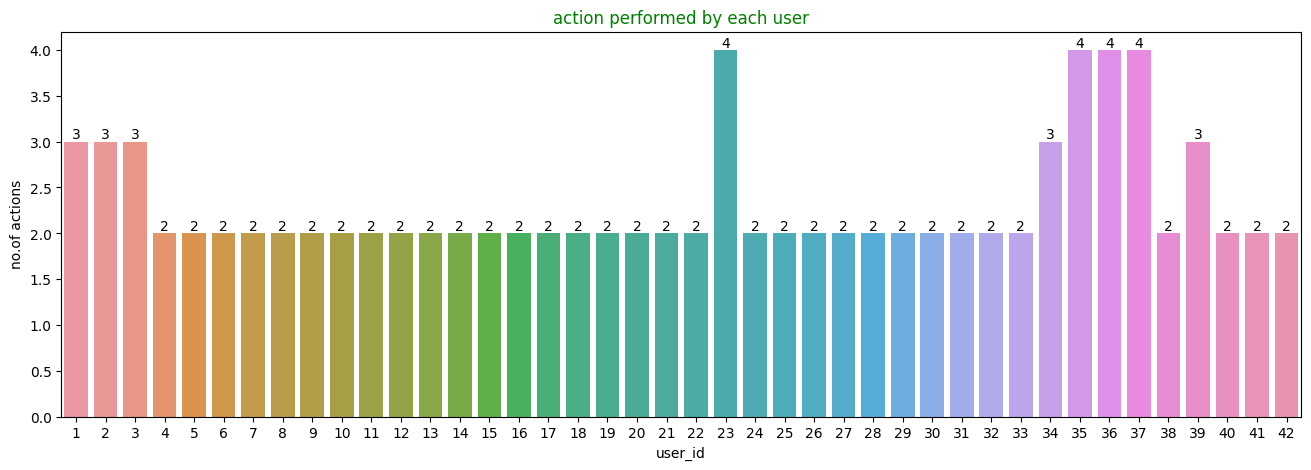

In [234]:
plt.figure(figsize=(16,5))
ds=sns.barplot(x=s,y=ip)
for i in ds.containers:
    ds.bar_label(i)
plt.title('action performed by each user',color='green')
plt.ylabel('no.of actions')

####  From the graph above graph, we observed all users actions

## -------------------------------------------------------------------------------------------------------------------------------------

#  Q2-determine the most common action perform by user

In [210]:
ja=df.value_counts(['action'])
ja

action 
share      33
comment    32
like       32
Name: count, dtype: int64

In [211]:
hg=ja.values
hg

array([33, 32, 32], dtype=int64)

In [212]:
ge=['like','share','comment']

Text(0.5, 1.0, 'most common action')

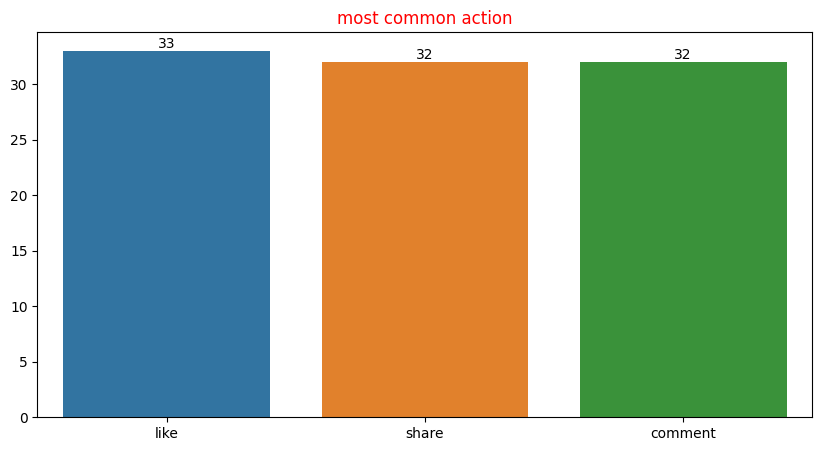

In [214]:
plt.figure(figsize=(10,5))
dq=sns.barplot(y=hg,x=ge)
for i in dq.containers:
    dq.bar_label(i)
plt.title('most common action',color='red')

#### from above answer we observed that the count of like is more then others

## ----------------------------------------------------------------------------------------------------------------------------------

# Q-3 identify the user who has the highest enagement (sum of all actions)

In [215]:
p=df.groupby('user_id')['action'].count()
p.head()

user_id
1    3
2    3
3    3
4    2
5    2
Name: action, dtype: int64

In [216]:
o=p.sort_values(ascending=False).head()
o

user_id
37    4
23    4
35    4
36    4
1     3
Name: action, dtype: int64

In [217]:
g=o.index
g

Index([37, 23, 35, 36, 1], dtype='int64', name='user_id')

In [218]:
f=o.values
f

array([4, 4, 4, 4, 3], dtype=int64)

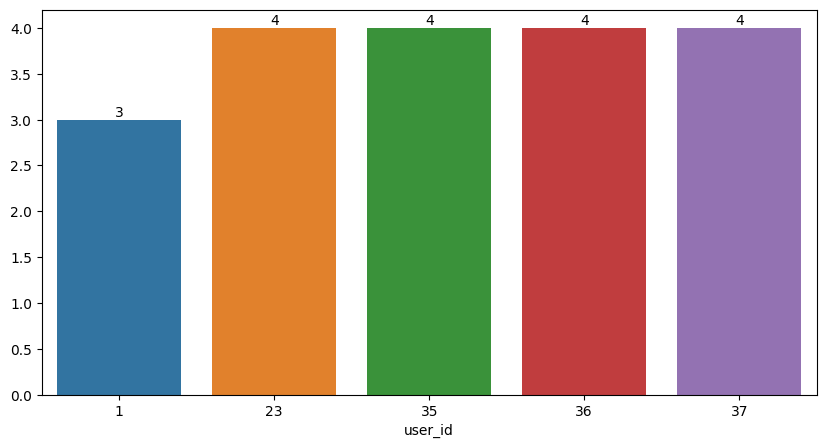

In [219]:
plt.figure(figsize=(10,5))
d=sns.barplot(x=g,y=f)
for i in d.containers:
    d.bar_label(i)

#### From the above graph, we can observe that the user_id 37,23,35,36 has the highest engagement among all of them

## -----------------------------------------------------------------------------------------------------------------------------------

# Q4- provide statistics on user activity over time (eg,hourly,daily,or monthly trends) 

In [188]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [189]:
hourly=df.groupby(df['timestamp'].dt.hour)['user_id'].count()
hourly

timestamp
12    11
13    12
14    13
15    12
16    12
17    14
18    17
19     5
20     1
Name: user_id, dtype: int64

Text(0.5, 0, 'Hours')

<Figure size 400x500 with 0 Axes>

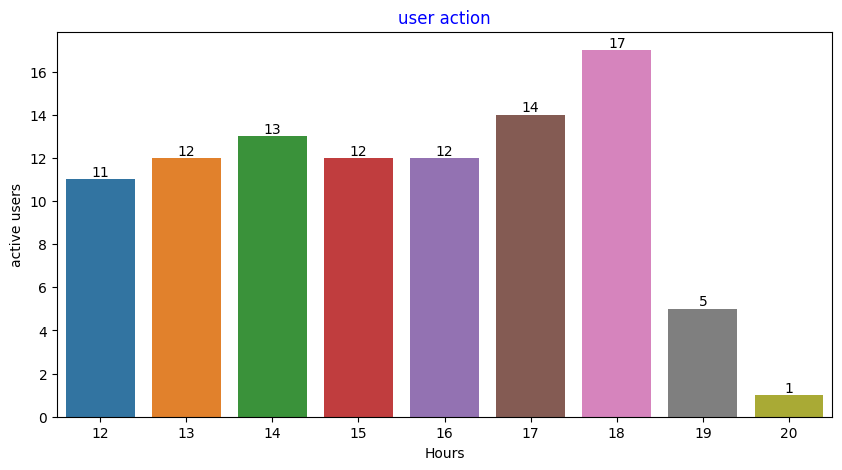

In [192]:
plt.figure(figsize=(4,5))
plt.figure(figsize=(10,5))
d=sns.barplot(x=hourly.index,y=hourly)
for i in d.containers:
    d.bar_label(i)
plt.title('user action',color='blue')
plt.ylabel('active users')
plt.xlabel('Hours')



#### from the above graph we can statistics on user activity over time 